# Use Decision trees to prepare a model on fraud data 
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description :

* **Undergrad : person is under graduated or not**
* **Marital.Status : marital status of a person**
* **Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government** 
* **Work Experience : Work experience of an individual person**
* **Urban : Whether that person belongs to urban area or not**

In [62]:
import pandas as pd
import numpy as np

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('Fraud_check.csv')

In [65]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Let's encode target variable according to question.

In [66]:
lis = []
for i in df['Taxable.Income']:
    if i <= 30000:
        lis.append('Risky')
    else:
        lis.append('Good')

In [68]:
df['Taxable.Income'] = lis

In [71]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [72]:
df.shape

(600, 6)

* There are 600 rows and 6 columns are present in this dataset.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


* There is no null value present in this dataset.

In [74]:
df.duplicated().sum()

0

* There is no duplicates present in this dataset.

In [75]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


## Let's Explore columns

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [77]:
f1 = df['Undergrad'].value_counts()
f1

YES    312
NO     288
Name: Undergrad, dtype: int64

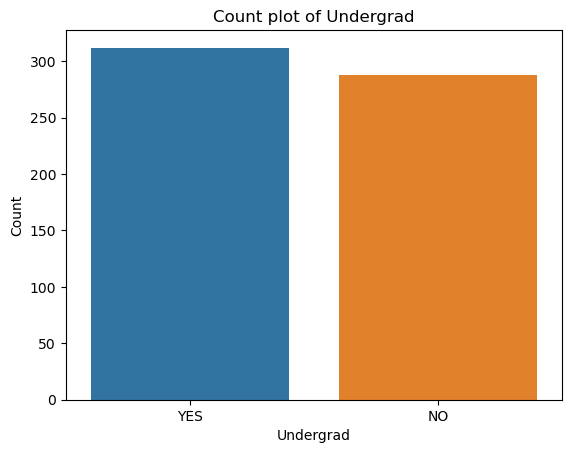

In [78]:
sns.barplot(x=f1.keys(),y=f1.values)
plt.xlabel('Undergrad')
plt.ylabel('Count')
plt.title('Count plot of Undergrad')
plt.show()

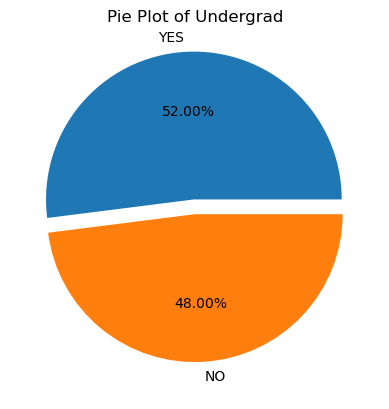

In [79]:
plt.pie(f1, labels=f1.keys(),autopct='%0.2f%%',explode=[0.1,0])
plt.title('Pie Plot of Undergrad')
plt.show()

In [80]:
f2 = df['Marital.Status'].value_counts()
f2

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

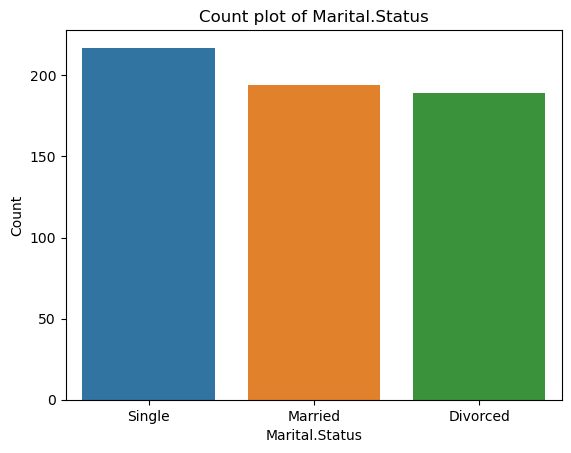

In [81]:
sns.barplot(x=f2.keys(),y=f2.values)
plt.xlabel('Marital.Status')
plt.ylabel('Count')
plt.title('Count plot of Marital.Status')
plt.show()

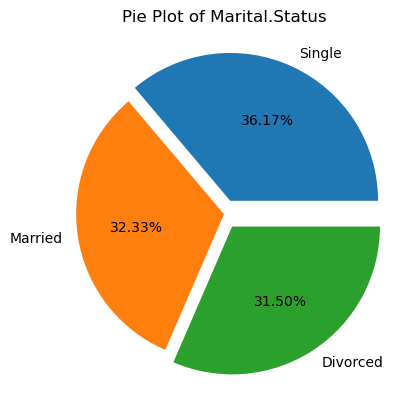

In [82]:
plt.pie(f2, labels=f2.keys(),autopct='%0.2f%%',explode=[0.1,0,0.1])
plt.title('Pie Plot of Marital.Status')
plt.show()

Most of the peoples are Single and least of the peoples are Divorced.

In [83]:
f3 = df['Urban'].value_counts()
f3

YES    302
NO     298
Name: Urban, dtype: int64

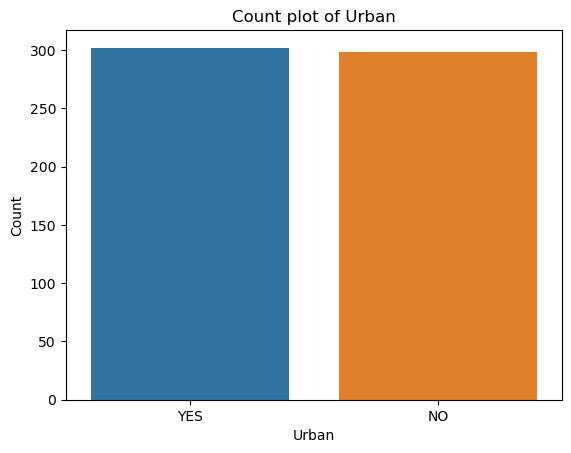

In [84]:
sns.barplot(x=f3.keys(),y=f3.values)
plt.xlabel('Urban')
plt.ylabel('Count')
plt.title('Count plot of Urban')
plt.show()

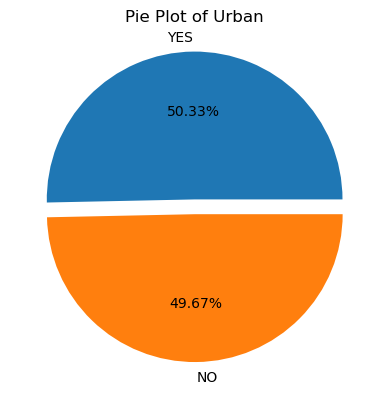

In [85]:
plt.pie(f3, labels=f3.keys(),autopct='%0.2f%%',explode=[0.1,0])
plt.title('Pie Plot of Urban')
plt.show()

* Approximately equal amount of people Urban and Non Urban.

In [86]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

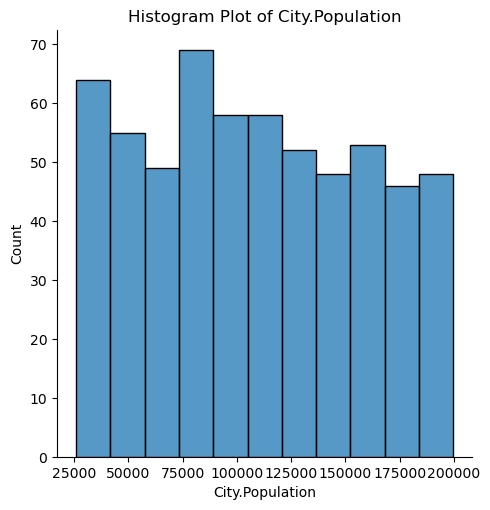

In [87]:
sns.displot(df['City.Population'])
plt.title('Histogram Plot of City.Population')
plt.show()

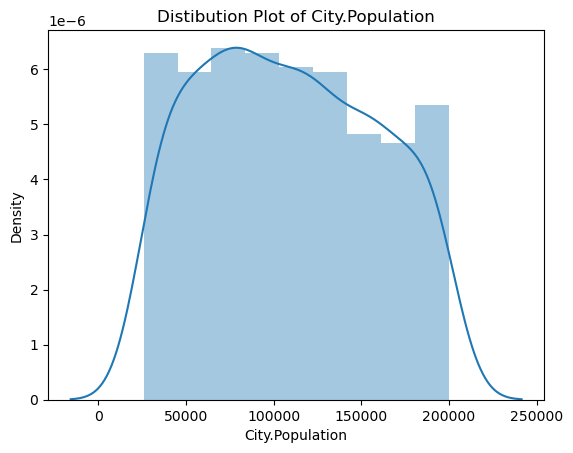

In [88]:
sns.distplot(df['City.Population'])
plt.title('Distibution Plot of City.Population')
plt.show()

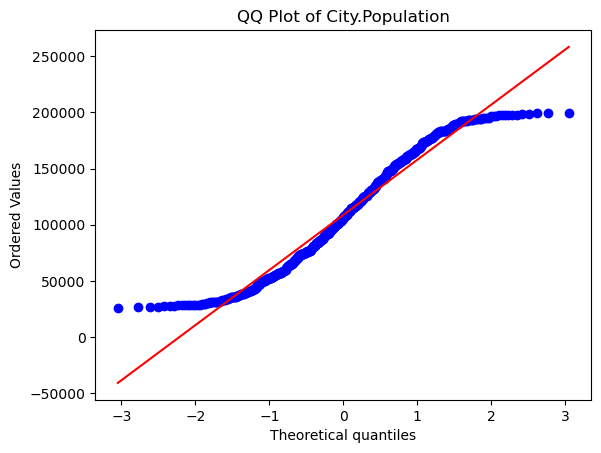

In [89]:
stats.probplot(df['City.Population'], dist="norm", plot=plt)
plt.title('QQ Plot of City.Population')
plt.show()

* QQ Plot of City.Population showing data is almost normal distributed.

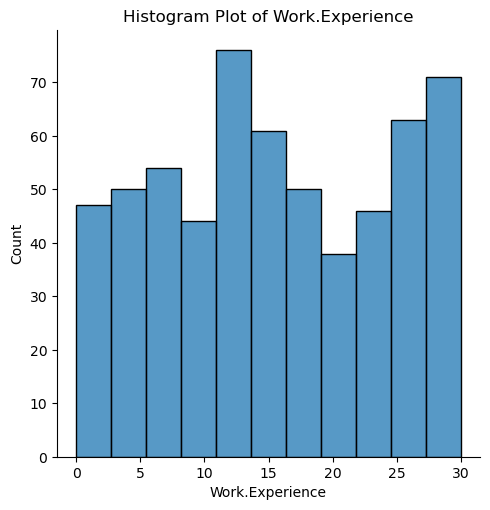

In [90]:
sns.displot(df['Work.Experience'])
plt.title('Histogram Plot of Work.Experience')
plt.show()

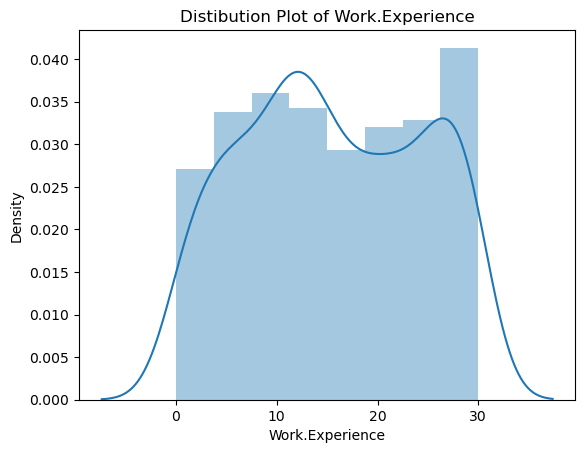

In [91]:
sns.distplot(df['Work.Experience'])
plt.title('Distibution Plot of Work.Experience')
plt.show()

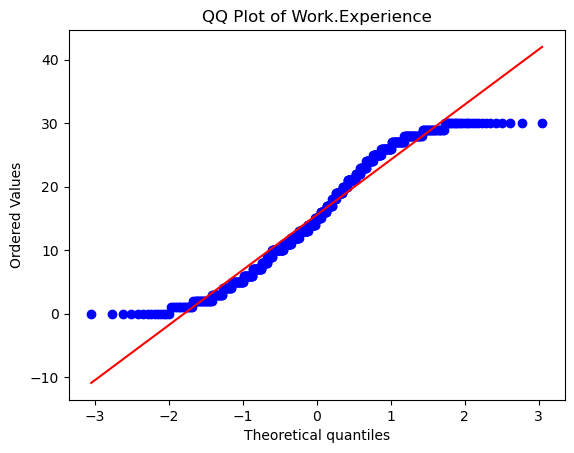

In [92]:
stats.probplot(df['Work.Experience'], dist="norm", plot=plt)
plt.title('QQ Plot of Work.Experience')
plt.show()

* Approximately normal distribution of Work.Experience.

## Let's check columns for 
## 1. Risky Taxable.Income

In [96]:
df_risk = df[df['Taxable.Income'].isin(['Risky'])]

In [98]:
df_risk.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,Risky,102602,19,YES
12,NO,Divorced,Risky,148033,14,YES
16,YES,Divorced,Risky,34551,29,NO
19,NO,Single,Risky,126953,30,YES
21,YES,Divorced,Risky,29106,7,YES


In [142]:
df_risk['City.Population'].mean()

109940.37096774194

* The area where population on an average 109940 belongs to risky taxable income.

In [101]:
df_risk['Work.Experience'].mode()[0]

7

* The year of experience 7  most frequent in risky taxable income.

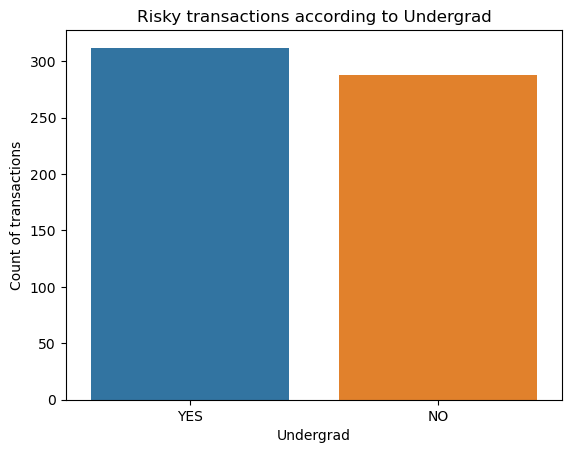

In [108]:
sns.barplot(y=df['Undergrad'].value_counts().values, x= df['Undergrad'].value_counts().keys())
plt.title('Risky transactions according to Undergrad')
plt.xlabel('Undergrad')
plt.ylabel('Count of transactions')
plt.show()

We can see the risky taxable income are more in Undergrad category compare to non-undergrad

In [109]:
g1 = df['Undergrad'].value_counts()

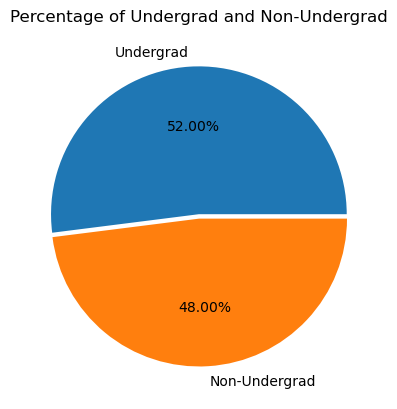

In [117]:
plt.pie(g1.values, labels = ['Undergrad','Non-Undergrad'], autopct='%0.2f%%', explode=[0,0.03])
plt.title('Percentage of Undergrad and Non-Undergrad')
plt.show()

In [118]:
g2 = df_risk['Marital.Status'].value_counts()

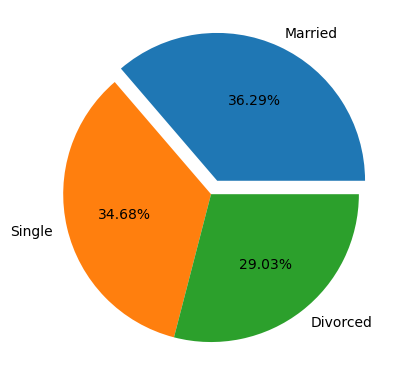

In [121]:
plt.pie(g2.values, labels=g2.keys(), autopct='%0.2f%%',explode=[0.1,0,0])
plt.show()

* Risky taxable income mostly done by Married people and single people. 

In [122]:
g3 = df_risk['Urban'].value_counts()

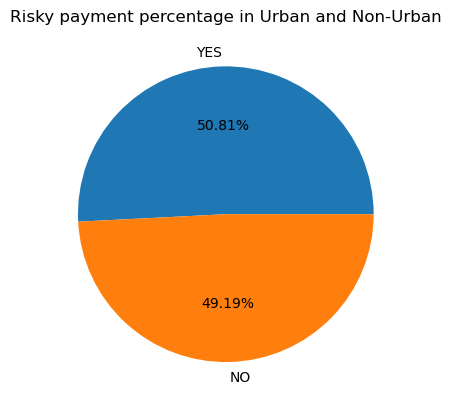

In [124]:
plt.pie(g3.values, labels = g3.keys(), autopct='%0.2f%%')
plt.title('Risky payment percentage in Urban and Non-Urban')
plt.show()

* Approximately Urban and Non Urban done equal risky taxable income.

### 2. Good Taxable.Income

In [125]:
df_good = df[df['Taxable.Income'].isin(['Good'])]

In [127]:
df_good.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [143]:
df_good['City.Population'].mean()

108436.58613445378

* The area where population on an average 108436 belongs to good taxable income.

In [144]:
df_good['Work.Experience'].mode()[0]

13

* The people years of experience do good taxable income.

In [128]:
g1 = df_good['Undergrad'].value_counts()

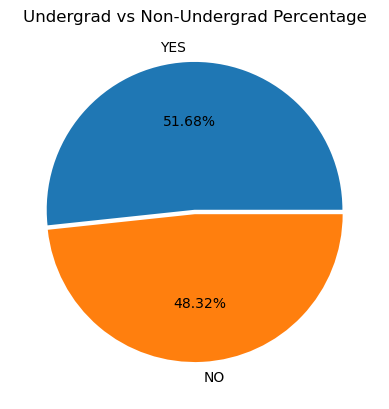

In [132]:
plt.pie(g1.values, labels = g1.keys(),autopct = '%0.2f%%',explode=[0.03,0])
plt.title('Undergrad vs Non-Undergrad Percentage')
plt.show()

* The people who belongs to Undergrad done more good transaction.

In [133]:
g2 = df_good['Urban'].value_counts()

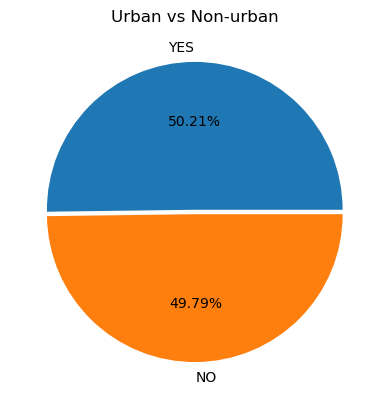

In [136]:
plt.pie(g2.values, labels = g2.keys(), autopct='%0.2f%%', explode=[0.03,0])
plt.title('Urban vs Non-urban')
plt.show()

In [139]:
g3 = df_good['Marital.Status'].value_counts()

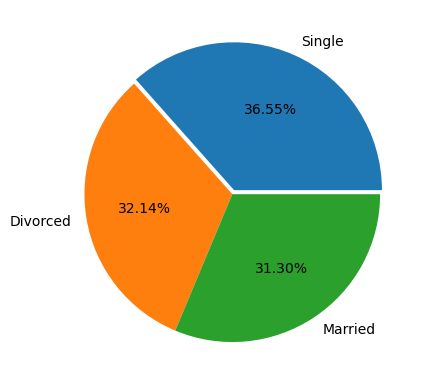

In [141]:
plt.pie(g3.values, labels=g3.keys(), autopct='%0.2f%%', explode=[0.03,0,0])
plt.show()

* Single people have done good tax payer.

## Let's do Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
data = df.copy()

In [29]:
data['Undergrad'] = le.fit_transform(data['Undergrad'])

In [30]:
data['Urban'] = le.fit_transform(data['Urban'])

In [31]:
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])

In [33]:
data['Taxable.Income'] = lis

In [34]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


* Now all categorical data encoded.

## Let's Split the data into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Let's Build the model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
train_pred = dt.predict(X_train)
train_pred[:5]

array(['Good', 'Good', 'Good', 'Good', 'Risky'], dtype=object)

In [42]:
test_pred = dt.predict(X_test)
test_pred[:5]

array(['Good', 'Good', 'Good', 'Good', 'Risky'], dtype=object)

## Let's Check performance of the matrics

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(1.0, 0.6833333333333333)

In [45]:
confusion_matrix(y_train, train_pred),confusion_matrix(y_test, test_pred)

(array([[382,   0],
        [  0,  98]], dtype=int64),
 array([[76, 18],
        [20,  6]], dtype=int64))

In [46]:
print('Classification Report for Train data')
print(classification_report(y_train, train_pred))

Classification Report for Train data
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [47]:
print('Classification Report for Test data')
print(classification_report(y_test, test_pred))

Classification Report for Test data
              precision    recall  f1-score   support

        Good       0.79      0.81      0.80        94
       Risky       0.25      0.23      0.24        26

    accuracy                           0.68       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.67      0.68      0.68       120



## Let's do Hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[8,10,16,20,25,30,35,40],
    'splitter':['best', 'random'],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
    
}

In [50]:
grid = GridSearchCV(DecisionTreeClassifier(),param, cv=5)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 16, 20, 25, 30, 35, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [52]:
print('Best Parameters')
grid.best_params_

Best Parameters


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'random'}

In [53]:
grid.best_score_

0.8020833333333333

## Let's Build the model suggested by GridgearchCV

In [54]:
model = DecisionTreeClassifier(criterion='gini'
                               ,max_depth=10,
                               max_features='log2',
                               min_samples_leaf=4,
                               min_samples_split=3,
                               splitter='random')

In [55]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=3, splitter='random')

In [56]:
## Predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [57]:
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.8, 0.8)

* We can see model is not overfitting because train and test accuracy is almost same.

## Let's visualize the tree

In [60]:
from sklearn.tree import plot_tree

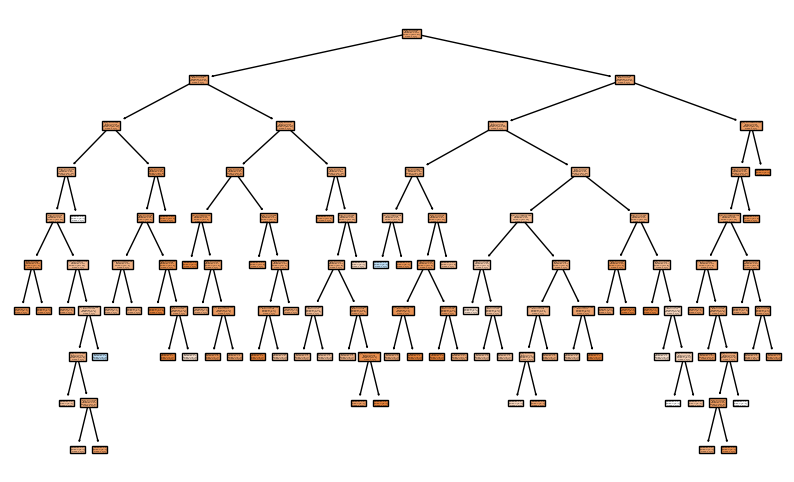

In [61]:
plt.figure(figsize=(10,6))
plot_tree(model,class_names=True,filled=True)
plt.show()

### Conclusion

* I have done EDA process and got some important information about Taxable Income.
1. Risky taxable income belongs to more in Undergrad compare to Non-Undergrad.
2. Risky taxable income most where people having years of experience 7
3. Risky taxable income most where people belong to Urban area.
4. Risky taxable income comes from where population on an average 109940
5. Good taxable income comes from where population on an average 108436
6. Good taxable income mostly comes from Marital status having Single.
* For model training
1. First I train the model with default hyperparameters and got overfitted model.
2. Second Build the model with hyperparameters suggested by GridSearchCV.